This Program tries to predict closing stock prices of Apple Inc.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [2]:
#Importing the dataset via pandas
data = pd.read_csv("C:\\Users\\Shaurya_nsut\\Documents\\B Tech\\Societies\\GDSC\\Recruit\\Round 2\\data\\apple_stock.csv")
#Displaying the first 5 rows of the dataset
print(data.head())
#Displaying last 5 rows of the dataset
print(data.tail())

         Date  Adj Close     Close      High       Low      Open     Volume
0  12-12-1980   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  15-12-1980   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  16-12-1980   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  17-12-1980   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  18-12-1980   0.091530  0.118862  0.119420  0.118862  0.118862   73449600
             Date   Adj Close       Close        High         Low        Open  \
11102  27-12-2024  255.589996  255.589996  258.700012  253.059998  257.829987   
11103  30-12-2024  252.199997  252.199997  253.500000  250.750000  252.229996   
11104  31-12-2024  250.419998  250.419998  253.279999  249.429993  252.440002   
11105  02-01-2025  243.850006  243.850006  249.100006  241.820007  248.929993   
11106  03-01-2025  243.860001  243.860001  244.179993  241.889999  243.369995   

         Volume  
11102  42355300  
11103  35557500  
111

In [3]:
#Checking standard information about the dataset
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,1.110700e+04
mean,23.522229,24.357607,24.598169,24.092608,24.339076,3.154341e+08
std,49.767881,50.217498,50.691902,49.682631,50.166818,3.348735e+08
min,0.037815,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,0.243402,0.300290,0.306362,0.292411,0.300090,1.111164e+08
50%,0.446682,0.542411,0.553393,0.534598,0.542679,2.036944e+08
75%,18.260086,21.397143,21.569285,21.115715,21.367679,3.960418e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,7.421641e+09


In [4]:
#Checking for NaN values
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [5]:
data.nunique()

Date         11107
Adj Close     8097
Close         6520
High          6356
Low           6344
Open          6410
Volume       10543
dtype: int64

Inferences from above data analysis:
1) Date column can be ignored as it is not contributing much of value to our Target variable.
2) The dataset contains only numeric data, so we don't need to perform encoding on any of the columns.
3) The number of NaN values in each of the columns is 0, so we don't need to impute any data.
4) All columns contain more than enough unique values.

In [6]:
data = data.drop("Date", axis = 1)

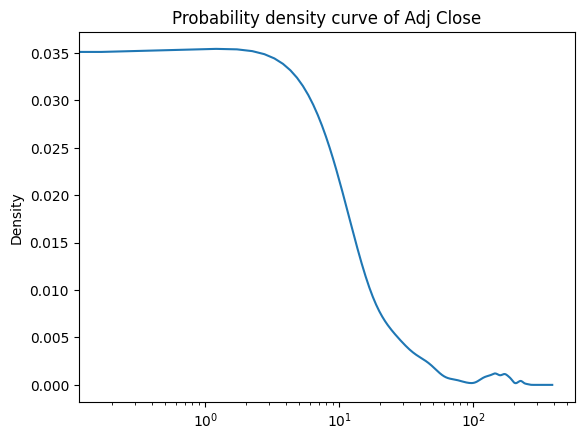

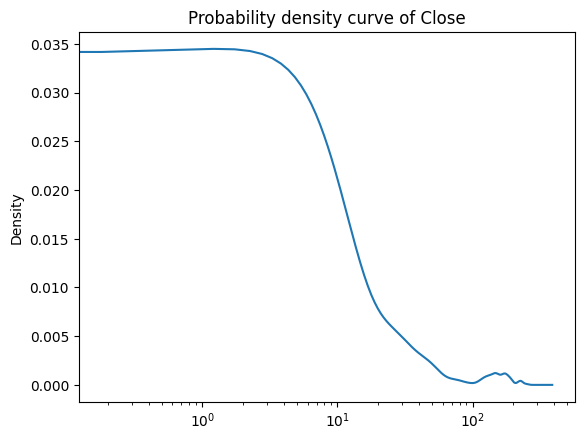

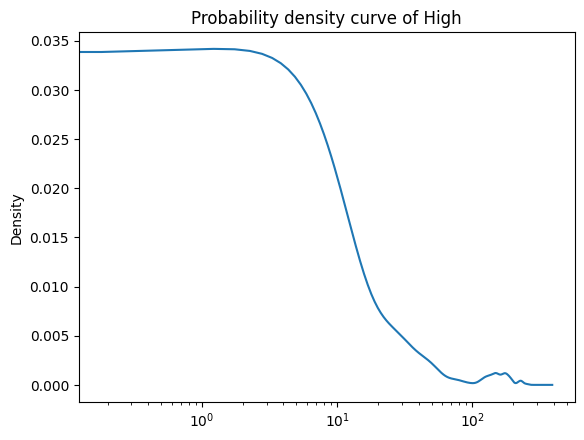

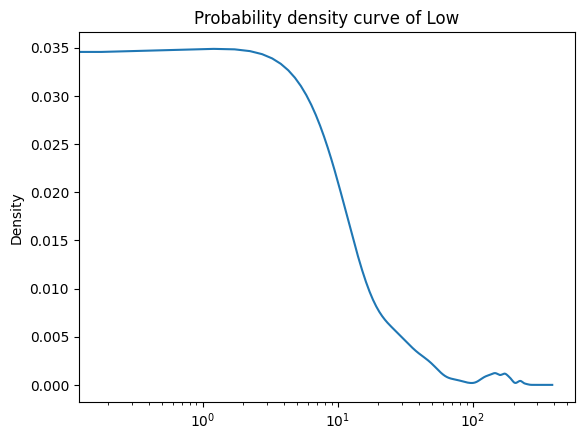

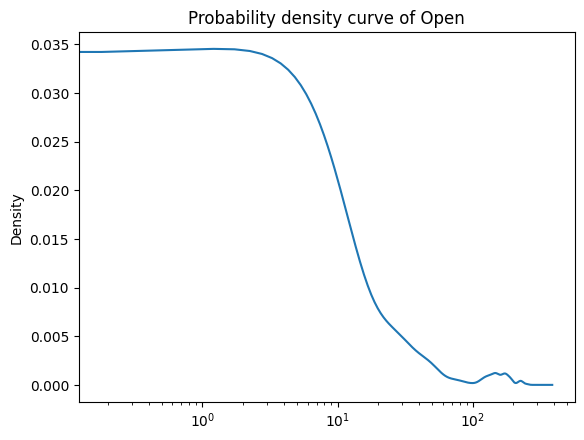

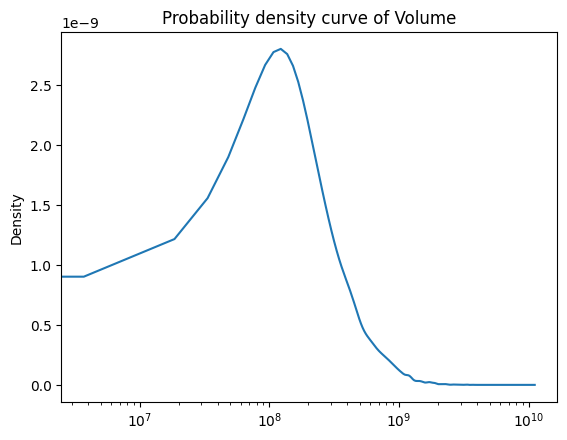

In [7]:
for col in data.columns:
    data[col].plot(kind = 'kde')
    plt.xscale('log')
    plt.title(f"Probability density curve of {col}")
    plt.show()

In [8]:
X = data.drop('Adj Close', axis = 1)
y = data['Adj Close']

In [9]:
df1 = pd.DataFrame()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE is: ", rmse)

RMSE is:  0.9586571869631938
